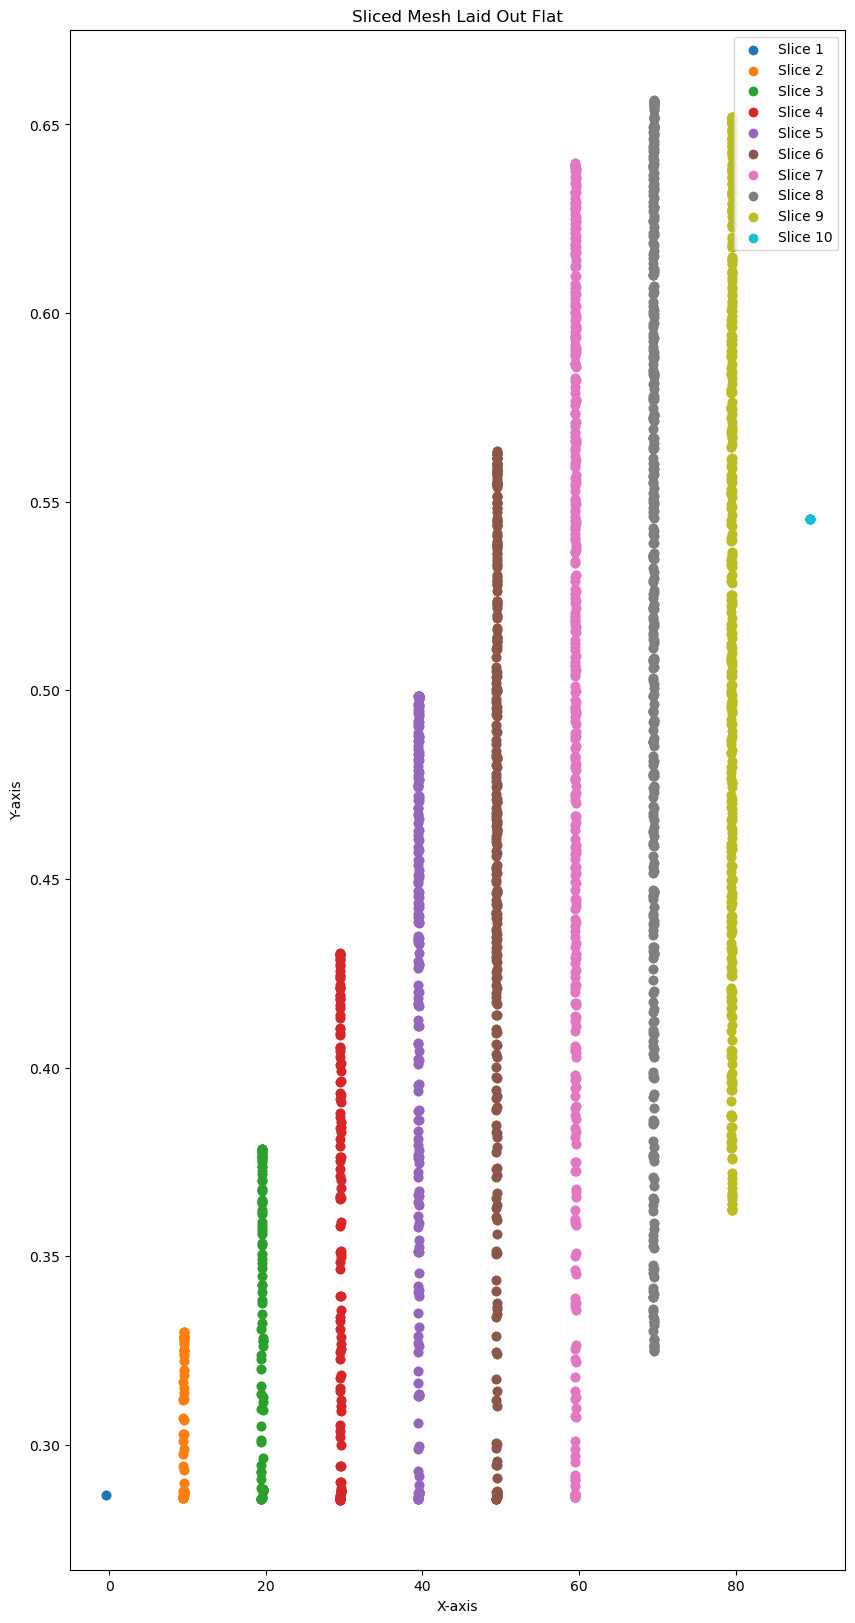

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

def slice_mesh_custom(mesh_path, num_slices=10, axis="z"):
    """
    Custom slicing of a 3D mesh and visualization of slices laid out flat.

    Parameters:
    - mesh_path: Path to the STL file.
    - num_slices: Number of slices to generate.
    - axis: Axis for slicing ('x', 'y', 'z').

    Returns:
    - Displays a visualization of the slices laid out flat.
    """
    # Step 1: Load the 3D mesh
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    mesh.compute_vertex_normals()

    # Step 2: Determine slicing axis and positions
    bbox = mesh.get_axis_aligned_bounding_box()
    min_bound = bbox.min_bound
    max_bound = bbox.max_bound
    axis_index = {"x": 0, "y": 1, "z": 2}[axis]
    slice_positions = np.linspace(min_bound[axis_index], max_bound[axis_index], num_slices)

    slices = []

    # Step 3: Slice the mesh manually
    vertices = np.asarray(mesh.vertices)
    triangles = np.asarray(mesh.triangles)

    for pos in slice_positions:
        plane_value = pos

        # Collect edges that intersect with the slicing plane
        slice_points = []
        for triangle in triangles:
            points = vertices[triangle]
            values = points[:, axis_index]
            # Check if the plane intersects the triangle
            if (values.min() <= plane_value) and (values.max() >= plane_value):
                for i in range(3):  # For each edge of the triangle
                    p1, p2 = points[i], points[(i + 1) % 3]
                    v1, v2 = p1[axis_index], p2[axis_index]
                    if (v1 - plane_value) * (v2 - plane_value) <= 0 and v1 != v2:
                        t = (plane_value - v1) / (v2 - v1)
                        intersection = p1 + t * (p2 - p1)
                        slice_points.append(intersection)

        # Store the 2D slice points
        slice_points = np.array(slice_points)
        if len(slice_points) > 0:
            slices.append(slice_points)

    # Step 4: Visualize the slices
    fig, ax = plt.subplots(figsize=(10, num_slices * 2))
    for i, slice_points in enumerate(slices):
        # Offset slices for flat layout
        offset = i * 10  # Adjust the spacing between slices
        if axis == "x":
            slice_points[:, 1] += offset
        elif axis == "y":
            slice_points[:, 0] += offset
        elif axis == "z":
            slice_points[:, 0] += offset

        # Plot the slice
        ax.scatter(slice_points[:, 0], slice_points[:, 1], label=f"Slice {i + 1}")

    ax.set_title("Sliced Mesh Laid Out Flat")
    ax.legend()
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

# File path to the provided STL file
mesh_file_path = "stump.stl"  # Replace with your local file path

# Visualize the slices laid out flat
slice_mesh_custom(mesh_file_path, num_slices=10, axis="z")